# Group 12 - Fingerhut FreshStart Customer Behavior Analysis

## Import Basic Libraries (specific libraries imported later)

In [ ]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import mchmm as mc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pydtmc

## EDA

In [ ]:
import pandas as pd
import datetime as dt

In [ ]:
# import datasets

fingerhut = pd.read_csv('../Dataset/export.csv')
event_def = pd.read_csv('../Dataset/event_definitions.csv')

In [ ]:
# Count how many rows have event_name == "order_shipped"

len(fingerhut[fingerhut['event_name'] == 'order_shipped'])

322949

In [ ]:
event_def

,event_name,journey_id,event_definition_id,milestone_number,stage
0,application_phone_approved,1,15,1.0,Apply for Credit
1,application_phone_declined,1,16,NaN,Apply for Credit
2,application_phone_pending,1,17,NaN,Apply for Credit
3,application_web_approved,1,12,1.0,Apply for Credit
4,application_web_declined,1,13,NaN,Apply for Credit
5,application_web_pending,1,14,NaN,Apply for Credit
6,application_web_submit,1,3,NaN,Apply for Credit
7,application_web_view,1,19,NaN,Apply for Credit
8,account_activitation,1,29,3.0,Credit Account
9,account_fraud_review,1,37,NaN,Credit Account


In [ ]:
len(event_def)

28

In [ ]:
# find number of unique values in each column

fingerhut.nunique()

customer_id                 1665688
account_id                  1735457
ed_id                            28
event_name                       28
event_timestamp            33672408
journey_steps_until_end        3299
dtype: int64

1) How many observations? What does an observation represent?

In [ ]:
len(fingerhut)

64911906

2) How many customers?

In [ ]:
# number of unique values in 'customer_id' column
print(fingerhut['customer_id'].nunique())

1665688
1735457


4) Do any accounts include more than one customer?  Do any customers have more than 1 account?

In [ ]:
# number of unique values in 'customer_id' column
print(fingerhut['customer_id'].nunique())

# number of unique values in 'account_id' column
print(fingerhut['account_id'].nunique())

1665688
1735457


In [ ]:
account_customer_grouped = fingerhut.groupby('account_id')['customer_id'].nunique()

sum(account_customer_grouped > 1)

310

In [ ]:
customer_account_grouped = fingerhut.groupby('customer_id')['account_id'].nunique()

sum(customer_account_grouped > 1)

68351

5) What time-period is covered? When are "busiest" times.

In [ ]:
# find earliest and latest dates in 'event_timestamp' column

print(fingerhut['event_timestamp'].min())
print(fingerhut['event_timestamp'].max())

2020-11-03T03:31:30.000Z
2023-09-20T12:29:58.000Z


In [ ]:
fingerhut['event_timestamp'] = pd.to_datetime(fingerhut['event_timestamp'])

In [ ]:
print(fingerhut['event_timestamp'].groupby(pd.to_datetime(fingerhut['event_timestamp']).dt.year).agg('count'))

event_timestamp
2020       46422
2021    30115793
2022    23826852
2023    10922839
Name: event_timestamp, dtype: int64

<AxesSubplot:xlabel='event_timestamp'>

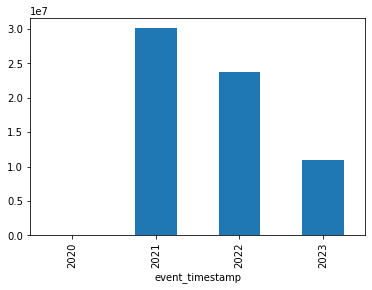

In [ ]:
fingerhut['event_timestamp'].groupby(pd.to_datetime(fingerhut['event_timestamp']).dt.year).agg('count').plot(kind='bar')

In [ ]:
print(fingerhut['event_timestamp'].groupby(pd.to_datetime(fingerhut['event_timestamp']).dt.month).agg('count'))

event_timestamp
1     4182881
2     5478495
3     6260453
4     6174741
5     6393195
6     5537276
7     5165159
8     4680412
9     3699536
10    4673370
11    6457975
12    6208413
Name: event_timestamp, dtype: int64

<AxesSubplot:xlabel='event_timestamp'>

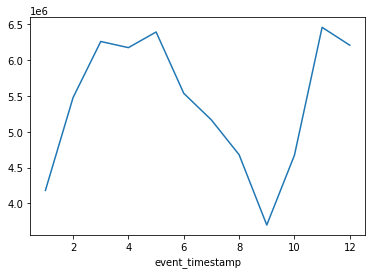

In [ ]:
# extract number of rows for each month in 'event_timestamp' column, and create plot of results

fingerhut['event_timestamp'].groupby(pd.to_datetime(fingerhut['event_timestamp']).dt.month).agg('count').plot(kind='line')

6) What can you say about the "journey steps until end" variable?

In [ ]:
# Find max journey steps value for each unique customer, and store values in list

unique_accounts = fingerhut['account_id'].unique()


In [ ]:
max_journey_steps = fingerhut.groupby('account_id')['journey_steps_until_end'].max()

<AxesSubplot:>

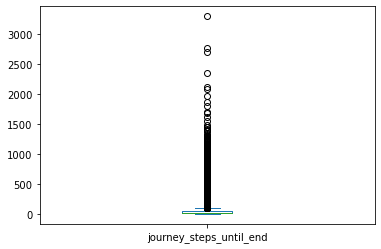

In [ ]:
# make boxplot of max journey steps values

max_journey_steps.plot(kind='box')

In [ ]:
fingerhut['account_id'] == 1773350293

0            True
1            True
2            True
3            True
4            True
            ...  
64911901    False
64911902    False
64911903    False
64911904    False
64911905    False
Name: account_id, Length: 64911906, dtype: bool

In [ ]:
# return row for account_id == -784961211 and ed_id == 12

print(fingerhut[(fingerhut['account_id'] == 1773350293) & (fingerhut['ed_id'] == 12)]['journey_steps_until_end'])

0    1
Name: journey_steps_until_end, dtype: int64


## Data Cleaning

In [ ]:
# import datasets

fingerhut = pd.read_csv('export.csv')
event_def = pd.read_csv('event_definitions.csv')

In [ ]:
# ignoring journey_steps_until_end, find all duplicate rows

figerhut_no_journey_steps_until_end = fingerhut.drop(columns=['journey_steps_until_end'])

duplicates = figerhut_no_journey_steps_until_end[figerhut_no_journey_steps_until_end.duplicated()]

duplicates

In [ ]:
fingerhut_copy = fingerhut.copy()

In [ ]:
# remove fingerhut from memory

del fingerhut

In [ ]:
# finding number of customer_ids per account_id
account_customer_grouped = fingerhut_copy.groupby('account_id')['customer_id'].nunique()

# return only the accounts with more than one customer
account_customer_grouped = account_customer_grouped[account_customer_grouped > 1]

In [ ]:
# finding number of account_ids per customer_id
customer_account_grouped = fingerhut_copy.groupby('customer_id')['account_id'].nunique()

# return only the customers with more than one account
customer_account_grouped = customer_account_grouped[customer_account_grouped > 1]

In [ ]:
# delete journey_steps_until_end column

del fingerhut_copy['journey_steps_until_end']

In [ ]:
# remove duplicate rows

fingerhut_copy = fingerhut_copy[~fingerhut_copy.duplicated()]

In [ ]:
# pull out the accounts with more than one customer

fingerhut_many_customers = fingerhut_copy[fingerhut_copy['account_id'].isin(account_customer_grouped.index)]

# pull out the customers with more than one account

fingerhut_many_accounts = fingerhut_copy[fingerhut_copy['customer_id'].isin(customer_account_grouped.index)]

# take out fingerhut_many_customers and fingerhut_many_accounts from fingerhut_copy

fingerhut_copy = fingerhut_copy[~fingerhut_copy['account_id'].isin(account_customer_grouped.index)]
fingerhut_copy = fingerhut_copy[~fingerhut_copy['customer_id'].isin(customer_account_grouped.index)]

In [ ]:
# reset index for all three dataframes

fingerhut_copy.reset_index(drop=True, inplace=True)
fingerhut_many_customers.reset_index(drop=True, inplace=True)
fingerhut_many_accounts.reset_index(drop=True, inplace=True)

In [ ]:
# create new column in fingerhut_copy called 'combined_id' starting at 0 and incrementing by 1 for each new account_id

fingerhut_copy['combined_id'] = fingerhut_copy.groupby('account_id').ngroup()

In [ ]:
# sort fingerhut_copy by combined_id

fingerhut_copy.sort_values(by=['combined_id'], inplace=True)

In [ ]:
# create new column in fingerhut_many_customers called 'combined_id' starting at fingerhut_copy['combined_id'].max()

fingerhut_many_customers['combined_id'] = fingerhut_many_customers.groupby('account_id').ngroup() + fingerhut_copy['combined_id'].max() + 1

In [ ]:
# sort fingerhut_many_customers by combined_id

fingerhut_many_customers.sort_values(by='combined_id', inplace=True)

In [ ]:
# create new column in fingerhut_many_accounts called 'combined_id' starting at fingerhut_many_customers['combined_id'].max()

fingerhut_many_accounts['combined_id'] = fingerhut_many_accounts.groupby('customer_id').ngroup() + fingerhut_many_customers['combined_id'].max() + 1

In [ ]:
# sort fingerhut_many_accounts by combined_id

fingerhut_many_accounts.sort_values(by='combined_id', inplace=True)

In [ ]:
# append all three dataframes together

fingerhut_combined = fingerhut_copy.append(fingerhut_many_customers)
fingerhut_combined = fingerhut_combined.append(fingerhut_many_accounts)

/var/folders/6m/88dwrhnx7m3cybxwl1p0rtq40000gn/T/ipykernel_63647/1808326863.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fingerhut_combined = fingerhut_copy.append(fingerhut_many_customers)
/var/folders/6m/88dwrhnx7m3cybxwl1p0rtq40000gn/T/ipykernel_63647/1808326863.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fingerhut_combined = fingerhut_combined.append(fingerhut_many_accounts)


In [ ]:
# for each combined_id, sort by event_timestamp

fingerhut_combined.sort_values(by=['combined_id', 'event_timestamp'], inplace=True)

In [ ]:
# reset index of fingerhut_combined

fingerhut_combined.reset_index(drop=True, inplace=True)

In [ ]:
# for every combined_id, add a column called 'journey_steps_until_end' that increments by 1 for each row

fingerhut_combined['journey_steps_until_end'] = fingerhut_combined.groupby('combined_id').cumcount(ascending=True)

In [ ]:
fingerhut_combined

,customer_id,account_id,ed_id,event_name,event_timestamp,combined_id,journey_steps_until_end
0,1807905151,-2147477843,2,campaign_click,2021-09-03T06:00:00.000Z,0,0
1,1807905151,-2147477843,12,application_web_approved,2021-09-03T21:46:20.000Z,0,1
2,1807905151,-2147477843,1,promotion_created,2021-09-03T21:46:26.680Z,0,2
3,1807905151,-2147477843,4,browse_products,2021-09-03T21:48:59.000Z,0,3
4,1807905151,-2147477843,4,browse_products,2021-09-03T21:55:06.000Z,0,4
...,...,...,...,...,...,...,...
56854843,2147449981,-203497522,4,browse_products,2023-07-22T20:47:49.000Z,1665430,37
56854844,2147449981,-203497522,5,view_cart,2023-07-22T20:47:49.000Z,1665430,38
56854845,2147449981,-203497522,11,add_to_cart,2023-07-22T20:47:49.000Z,1665430,39
56854846,2147449981,-203497522,6,begin_checkout,2023-07-22T20:47:49.000Z,1665430,40


In [ ]:
# export fingerhut_combined to csv

fingerhut_combined.to_csv('fingerhut_combined.csv', index=False)

In [ ]:
fingerhut_combined = pd.read_csv('fingerhut_combined.csv')

In [ ]:
event_definitions = pd.read_csv('event_definitions.csv')

In [ ]:
# find the first instance where ed_id = 24 in fingerhut_combined

fingerhut_combined[fingerhut_combined['ed_id'] == 24].head(1)

,customer_id,account_id,ed_id,event_name,event_timestamp,combined_id,journey_steps_until_end
397,-1329131321,-2147463068,24,campaignemail_clicked,2021-03-31T16:31:19.000Z,7,2


In [ ]:
# create dictionary based on 'stage' and 'event_definition_id' columns in event_definitions, using 'event_definition_id' as the key and 'stage' as the value

event_dict = event_definitions.set_index('event_definition_id')['stage'].to_dict()

# add additional key value pair
event_dict[1] = 'Promotion Created'
event_dict[24] = 'Campaignemail Clicked'

event_dict

{15: 'Apply for Credit',
 16: 'Apply for Credit',
 17: 'Apply for Credit',
 12: 'Apply for Credit',
 13: 'Apply for Credit',
 14: 'Apply for Credit',
 3: 'Apply for Credit',
 19: 'Apply for Credit',
 29: 'Credit Account',
 37: 'Credit Account',
 2: 'Discover',
 9: 'Discover',
 10: 'Discover',
 22: 'Discover',
 23: 'Discover',
 27: 'Downpayment',
 26: 'Downpayment',
 8: 'Downpayment',
 25: 'Downpayment',
 11: 'First Purchase',
 6: 'First Purchase',
 4: 'First Purchase',
 18: 'First Purchase',
 7: 'First Purchase',
 5: 'First Purchase',
 28: 'Order Shipped',
 20: 'Prospecting',
 21: 'Prospecting',
 1: 'Promotion Created',
 24: 'Campaignemail Clicked'}

In [ ]:
# append a new column to fingerhut_combined called 'stage' that contains the value from the dictionary based on the 'event_name' column

fingerhut_combined['stage'] = fingerhut_combined['ed_id'].map(event_dict)

In [ ]:
# count number of rows where 'stage' is NaN

fingerhut_combined['stage'].isna().sum()

0

In [ ]:
customer_characteristics = pd.DataFrame(fingerhut_combined['combined_id'].unique(), columns=['combined_id'])

customer_characteristics['application'] = np.nan
customer_characteristics['activation'] = np.nan
customer_characteristics['promotion_exposure'] = np.nan
customer_characteristics['place_order_web'] = np.nan
customer_characteristics['place_order_phone'] = np.nan
customer_characteristics['order_shipped'] = np.nan

customer_characteristics

,combined_id,application,activation,promotion_exposure,place_order_web,place_order_phone,order_shipped
0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1665426,1665426,NaN,NaN,NaN,NaN,NaN,NaN
1665427,1665427,NaN,NaN,NaN,NaN,NaN,NaN
1665428,1665428,NaN,NaN,NaN,NaN,NaN,NaN
1665429,1665429,NaN,NaN,NaN,NaN,NaN,NaN


### Application

In [ ]:
# check if there are any customers who do not have the 'Apply for Credit' stage in their journey, using groupby:

credit_applications = fingerhut_combined.groupby('combined_id')['stage'].apply(lambda x: 'Apply for Credit' in x.values)

In [ ]:
sum(credit_applications)

1664953

In [ ]:
# based on credit applications modify the customer_characteristics dataframe to add 0 to the 'application' column for customers who do not have the 'Apply for Credit' stage in their journey. Else add 1.

customer_characteristics['application'] = customer_characteristics['combined_id'].map(credit_applications)

customer_characteristics['application'] = customer_characteristics['application'].astype(int)

customer_characteristics

,combined_id,application,activation,promotion_exposure,place_order_web,place_order_phone,order_shipped
0,0,1,NaN,NaN,NaN,NaN,NaN
1,1,1,NaN,NaN,NaN,NaN,NaN
2,2,1,NaN,NaN,NaN,NaN,NaN
3,3,1,NaN,NaN,NaN,NaN,NaN
4,4,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1665426,1665426,1,NaN,NaN,NaN,NaN,NaN
1665427,1665427,1,NaN,NaN,NaN,NaN,NaN
1665428,1665428,1,NaN,NaN,NaN,NaN,NaN
1665429,1665429,1,NaN,NaN,NaN,NaN,NaN


### Promotion

In [ ]:
promotion_ids = [2, 9, 20, 21, 1, 24]

# check if there are any customers who have not been exposed to any promotions, using groupby (has at least one promotion_id as ed_id):

promotion_exposure = fingerhut_combined.groupby('combined_id')['ed_id'].apply(lambda x: any(i in promotion_ids for i in x.values))

sum(promotion_exposure)

1523909

In [ ]:
# based on promotion exposure modify the customer_characteristics dataframe to add 1 to the 'promotion_exposure' column for customers who have not been exposed to any promotions. Else add 0.

customer_characteristics['promotion_exposure'] = customer_characteristics['combined_id'].map(promotion_exposure)

customer_characteristics['promotion_exposure'] = customer_characteristics['promotion_exposure'].astype(int)

### Activation

In [ ]:
# CHANGING SYSTEM-WIDE TYPO

# change all values 'account_activitation' to 'account_activation' in the 'event_name' column

fingerhut_combined['event_name'] = fingerhut_combined['event_name'].replace('account_activitation', 'account_activation')

In [ ]:
# check if event_name 'account_activitation' is in the journey of each customer using groupby:

account_activations = fingerhut_combined.groupby('combined_id')['event_name'].apply(lambda x: 'account_activation' in x.values)

account_activations

combined_id
0           True
1           True
2          False
3          False
4           True
           ...  
1665426    False
1665427    False
1665428     True
1665429    False
1665430    False
Name: event_name, Length: 1665431, dtype: bool

In [ ]:
sum(account_activations)

410862

In [ ]:
# based on account_activations modify the customer_characteristics dataframe to add 0 to the 'activation' column for customers who do not have the 'account_activation' stage in their journey. Else add 1.

customer_characteristics['activation'] = customer_characteristics['combined_id'].map(account_activations)

customer_characteristics['activation'] = customer_characteristics['activation'].astype(int)

customer_characteristics

,combined_id,application,activation,promotion_exposure,place_order_web,place_order_phone,order_shipped
0,0,1,1,1,NaN,NaN,NaN
1,1,1,1,1,NaN,NaN,NaN
2,2,1,0,1,NaN,NaN,NaN
3,3,1,0,1,NaN,NaN,NaN
4,4,1,1,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1665426,1665426,1,0,1,NaN,NaN,NaN
1665427,1665427,1,0,1,NaN,NaN,NaN
1665428,1665428,1,1,1,NaN,NaN,NaN
1665429,1665429,1,0,1,NaN,NaN,NaN


### Placed Order

In [ ]:
# check if 'place_order_phone' or 'place_order_web' is in the journey of each customer using groupby:

place_orders_web = fingerhut_combined.groupby('combined_id')['event_name'].apply(lambda x: 'place_order_web' in x.values)

place_orders_phone = fingerhut_combined.groupby('combined_id')['event_name'].apply(lambda x: 'place_order_phone' in x.values)

sum(place_orders_web)
sum(place_orders_phone)

54662

In [ ]:
# based on place_orders modify the customer_characteristics dataframe to add 0 to the 'place_order' column for customers who do not have the 'place_order_phone' or 'place_order_web' stage in their journey. Else add 1.

customer_characteristics['place_order_web'] = customer_characteristics['combined_id'].map(place_orders_web)
customer_characteristics['place_order_phone'] = customer_characteristics['combined_id'].map(place_orders_phone)

customer_characteristics['place_order_web'] = customer_characteristics['place_order_web'].astype(int)
customer_characteristics['place_order_phone'] = customer_characteristics['place_order_phone'].astype(int)

customer_characteristics

,combined_id,application,activation,promotion_exposure,place_order_web,place_order_phone,order_shipped
0,0,1,1,1,1,0,NaN
1,1,1,1,1,1,0,NaN
2,2,1,0,1,0,0,NaN
3,3,1,0,1,0,0,NaN
4,4,1,1,1,1,0,NaN
...,...,...,...,...,...,...,...
1665426,1665426,1,0,1,0,0,NaN
1665427,1665427,1,0,1,0,0,NaN
1665428,1665428,1,1,1,1,0,NaN
1665429,1665429,1,0,1,0,0,NaN


### Order Shipped

In [ ]:
# check if 'order_shipped' is in the journey of each customer using groupby:

order_shipped = fingerhut_combined.groupby('combined_id')['event_name'].apply(lambda x: 'order_shipped' in x.values)

sum(order_shipped)

320680

In [ ]:
# based on order_shipped modify the customer_characteristics dataframe to add 0 to the 'order_shipped' column for customers who do not have the 'order_shipped' stage in their journey. Else add 1.

customer_characteristics['order_shipped'] = customer_characteristics['combined_id'].map(order_shipped)

customer_characteristics['order_shipped'] = customer_characteristics['order_shipped'].astype(int)

customer_characteristics

,combined_id,application,activation,promotion_exposure,place_order_web,place_order_phone,order_shipped
0,0,1,1,1,1,0,1
1,1,1,1,1,1,0,1
2,2,1,0,1,0,0,0
3,3,1,0,1,0,0,0
4,4,1,1,1,1,0,1
...,...,...,...,...,...,...,...
1665426,1665426,1,0,1,0,0,0
1665427,1665427,1,0,1,0,0,0
1665428,1665428,1,1,1,1,0,1
1665429,1665429,1,0,1,0,0,0


In [ ]:
# export the customer_characteristics dataframe as a pickle file

customer_characteristics.to_pickle('../Dataset/customer_characteristics.pkl')

### Wide Dataframe (events as lists)

In [ ]:
# groupby 'combined_id' and store the 'ed_id' and 'stage' as a list in columns named 'ed_ids' and 'stages'

fingerhut_combined_grouped = fingerhut_combined.groupby('combined_id').agg({'ed_id': list, 'stage': list, 'event_timestamp': list}).reset_index()

fingerhut_combined_grouped

,combined_id,ed_id,stage,event_timestamp
0,0,"[2, 12, 1, 4, 4, 4, 11, 1, 5, 6, 1, 1, 4, 11, ...","[Discover, Apply for Credit, Promotion Created...","[2021-09-03T06:00:00.000Z, 2021-09-03T21:46:20..."
1,1,"[2, 4, 11, 4, 4, 11, 4, 4, 4, 11, 4, 4, 5, 4, ...","[Discover, First Purchase, First Purchase, Fir...","[2021-02-20T06:00:00.000Z, 2021-02-20T22:23:39..."
2,2,"[19, 19, 19, 19, 19, 19, 19, 19, 3, 19, 12, 4,...","[Apply for Credit, Apply for Credit, Apply for...","[2022-12-11T07:43:02.000Z, 2022-12-11T07:43:04..."
3,3,"[12, 2, 22]","[Apply for Credit, Discover, Discover]","[2023-07-02T13:43:31.000Z, 2023-07-02T19:43:31..."
4,4,"[12, 4, 4, 19, 5, 4, 11, 1, 5, 6, 29, 4, 11, 5...","[Apply for Credit, First Purchase, First Purch...","[2021-11-20T14:49:13.000Z, 2021-11-20T14:52:13..."
...,...,...,...,...
1665426,1665426,"[12, 4, 4, 4, 4, 4, 4, 11, 4, 11, 4, 4, 4, 4, ...","[Apply for Credit, First Purchase, First Purch...","[2021-03-24T11:00:21.000Z, 2021-03-24T11:07:37..."
1665427,1665427,"[3, 3, 3, 3, 3, 12, 4, 4, 4, 4, 4, 4, 1, 1, 4,...","[Apply for Credit, Apply for Credit, Apply for...","[2021-08-02T16:17:10.000Z, 2021-08-02T16:18:38..."
1665428,1665428,"[5, 5, 19, 19, 19, 19, 19, 19, 19, 19, 3, 12, ...","[First Purchase, First Purchase, Apply for Cre...","[2022-05-22T19:14:41.000Z, 2022-05-22T19:29:11..."
1665429,1665429,"[2, 12, 4, 4, 4, 4, 4, 11, 5, 6, 5, 4, 4, 4, 1...","[Discover, Apply for Credit, First Purchase, F...","[2021-03-21T06:00:00.000Z, 2021-03-21T17:25:43..."


In [ ]:
# import customer_characteristics.pkl

customer_characteristics = pd.read_pickle('customer_characteristics.pkl')

In [ ]:
# merge the fingerhut_combined_grouped dataframe with the customer_characteristics dataframe

fingerhut_combined_grouped = pd.merge(fingerhut_combined_grouped, customer_characteristics, on='combined_id')

fingerhut_combined_grouped

,combined_id,ed_id,stage,event_timestamp,application,activation,promotion_exposure,place_order_web,place_order_phone,order_shipped
0,0,"[2, 12, 1, 4, 4, 4, 11, 1, 5, 6, 1, 1, 4, 11, ...","[Discover, Apply for Credit, Promotion Created...","[2021-09-03T06:00:00.000Z, 2021-09-03T21:46:20...",1,1,1,1,0,1
1,1,"[2, 4, 11, 4, 4, 11, 4, 4, 4, 11, 4, 4, 5, 4, ...","[Discover, First Purchase, First Purchase, Fir...","[2021-02-20T06:00:00.000Z, 2021-02-20T22:23:39...",1,1,1,1,0,1
2,2,"[19, 19, 19, 19, 19, 19, 19, 19, 3, 19, 12, 4,...","[Apply for Credit, Apply for Credit, Apply for...","[2022-12-11T07:43:02.000Z, 2022-12-11T07:43:04...",1,0,1,0,0,0
3,3,"[12, 2, 22]","[Apply for Credit, Discover, Discover]","[2023-07-02T13:43:31.000Z, 2023-07-02T19:43:31...",1,0,1,0,0,0
4,4,"[12, 4, 4, 19, 5, 4, 11, 1, 5, 6, 29, 4, 11, 5...","[Apply for Credit, First Purchase, First Purch...","[2021-11-20T14:49:13.000Z, 2021-11-20T14:52:13...",1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1665426,1665426,"[12, 4, 4, 4, 4, 4, 4, 11, 4, 11, 4, 4, 4, 4, ...","[Apply for Credit, First Purchase, First Purch...","[2021-03-24T11:00:21.000Z, 2021-03-24T11:07:37...",1,0,1,0,0,0
1665427,1665427,"[3, 3, 3, 3, 3, 12, 4, 4, 4, 4, 4, 4, 1, 1, 4,...","[Apply for Credit, Apply for Credit, Apply for...","[2021-08-02T16:17:10.000Z, 2021-08-02T16:18:38...",1,0,1,0,0,0
1665428,1665428,"[5, 5, 19, 19, 19, 19, 19, 19, 19, 19, 3, 12, ...","[First Purchase, First Purchase, Apply for Cre...","[2022-05-22T19:14:41.000Z, 2022-05-22T19:29:11...",1,1,1,1,0,1
1665429,1665429,"[2, 12, 4, 4, 4, 4, 4, 11, 5, 6, 5, 4, 4, 4, 1...","[Discover, Apply for Credit, First Purchase, F...","[2021-03-21T06:00:00.000Z, 2021-03-21T17:25:43...",1,0,1,0,0,0


In [ ]:
# export fingerhut_combined_grouped to a pickle file int ../Dataset

fingerhut_combined_grouped.to_pickle('fingerhut_combined_grouped.pkl')

## Data Visualization

### Sankey Diagram

In [ ]:
# import datasets

event_def = pd.read_csv('event_definitions.csv')
fingerhut_combined = pd.read_csv('Dataset/fingerhut_combined.csv')

In [ ]:
event_dict = {
    'Apply for Credit': [15, 17, 12, 14, 3, 19],
    'Account Activation': [29],
    'Fraud Review': [37],
    'Promotion and Discover': [1, 2, 9, 10, 22, 23, 20, 21, 24],
    'Downpayment': [27, 26, 8, 25],
    'Shopping': [11, 6, 4, 5],
    'Place Order': [18, 7],
    'Order Shipped': [28]
}

In [ ]:
# merge event_def (event_definition_id column) with fingerhut_combined (ed_id column)

fingerhut_combined = pd.merge(fingerhut_combined, event_def, how='left', left_on='ed_id', right_on='event_definition_id')

In [ ]:
# min and max values from 'combined_id' column

min_combined_id = fingerhut_combined['combined_id'].min()
max_combined_id = fingerhut_combined['combined_id'].max()

In [ ]:
max_combined_id

1665430

In [ ]:
# random 1000 numbers from 1 to 1665430

import random

random.seed(0)

random_numbers = random.sample(range(1, 1665430), 1000)

In [ ]:
len(random_numbers)

1000

In [ ]:
# keep only rows where combined_id is in random_numbers

fingerhut_small = fingerhut_combined[fingerhut_combined['combined_id'].isin(random_numbers)]

#############################################################################################

In [ ]:
# groupby combined_id and only keep groups that has at least one instance of ed_id == 29 (account_activation) and does not have any instance of ed_id == 16 (application_phone_declined) or ed_id == 13 (application_web_declined)

fingerhut_active_account = fingerhut_small.groupby('combined_id').filter(lambda x: (x['ed_id'] == 29).any() & (x['ed_id'] != 16).all() & (x['ed_id'] != 13).all())

In [ ]:
# only keep 'combined_id', 'event_timestamp', 'event_name_y'

fingerhut_active_account = fingerhut_active_account[['combined_id', 'ed_id']]

In [ ]:
fingerhut_active_account

,combined_id,ed_id
216820,6779,19
216821,6779,19
216822,6779,19
216823,6779,19
216824,6779,19
...,...,...
56704687,1663724,29
56704688,1663724,15
56704689,1663724,18
56704690,1663724,27


In [ ]:
# Use the event_dict to create a new column called 'event_type' in fingerhut_active_account. The value of 'event_type' should be the key of the event_dict, which has lists of ed_id as values.

fingerhut_active_account['event_type'] = fingerhut_active_account['ed_id'].map({v: k for k, l in event_dict.items() for v in l})

In [ ]:
# remove ed_id column

fingerhut_active_account = fingerhut_active_account.drop(columns=['ed_id'])

# remove duplicates

fingerhut_active_account = fingerhut_active_account.drop_duplicates()

In [ ]:
fingerhut_active_account

,combined_id,event_type
216820,6779,Apply for Credit
216832,6779,Shopping
216838,6779,Promotion and Discover
216860,6779,Downpayment
216861,6779,Place Order
...,...,...
56704676,1663724,Promotion and Discover
56704687,1663724,Account Activation
56704689,1663724,Place Order
56704690,1663724,Downpayment


In [ ]:
# groupby combined_id, and if the last event_type is not 'Order Shipped', then add new row with event_type 'No Order Made', and also add the combined_id to the new row

fingerhut_active_account = fingerhut_active_account.groupby('combined_id').apply(lambda x: x.append({'event_type': 'No Order Made', 'combined_id': x['combined_id'].iloc[0]}, ignore_index=True) if x['event_type'].iloc[-1] != 'Order Shipped' else x)

# reset index

fingerhut_active_account = fingerhut_active_account.reset_index(drop=True)

/var/folders/6m/88dwrhnx7m3cybxwl1p0rtq40000gn/T/ipykernel_3528/1022833914.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fingerhut_active_account = fingerhut_active_account.groupby('combined_id').apply(lambda x: x.append({'event_type': 'No Order Made', 'combined_id': x['combined_id'].iloc[0]}, ignore_index=True) if x['event_type'].iloc[-1] != 'Order Shipped' else x)
/var/folders/6m/88dwrhnx7m3cybxwl1p0rtq40000gn/T/ipykernel_3528/1022833914.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fingerhut_active_account = fingerhut_active_account.groupby('combined_id').apply(lambda x: x.append({'event_type': 'No Order Made', 'combined_id': x['combined_id'].iloc[0]}, ignore_index=True) if x['event_type'].iloc[-1] != 'Order Shipped' else x)
/var/folders/6m/88dwrhnx7m3cybxwl1p0rtq40000gn/T/ipykernel_3528/10228339

In [ ]:
# check for NA values

fingerhut_active_account.isna().sum()

combined_id    0
event_type     0
dtype: int64

In [ ]:
fingerhut_active_account['sequence'] = fingerhut_active_account.groupby('combined_id').cumcount() + 1

In [ ]:
fingerhut_active_account

,combined_id,event_type,sequence
0,6779,Apply for Credit,1
1,6779,Shopping,2
2,6779,Promotion and Discover,3
3,6779,Downpayment,4
4,6779,Place Order,5
...,...,...,...
1536,1663724,Promotion and Discover,3
1537,1663724,Account Activation,4
1538,1663724,Place Order,5
1539,1663724,Downpayment,6


In [ ]:
pivot_fingerhut_active_account = fingerhut_active_account.pivot(index='combined_id', columns='sequence', values='event_type').reset_index(inplace=False)

In [ ]:
pivot_fingerhut_active_account = pivot_fingerhut_active_account.fillna('')

In [ ]:
import pandas as pd
import plotly.graph_objects as go

def generate_sankey_chart_data(df: pd.DataFrame):
    # list of list: each list is the set of nodes in each tier/column
    column_values = [df[col] for col in df.columns]

    # this generates the labels for the sankey by taking all the unique values
    labels = sum([list(node_values.unique()) for node_values in column_values], [])

    # initializes a dict of dicts (one dict per tier)
    link_mappings = {col: {} for col in df.columns}

    # each dict maps a node to a unique number value
    i = 0
    for col, nodes in zip(df.columns, column_values):
        for node in nodes.unique():
            link_mappings[col][node] = i
            i += 1

    # specifying which columns are serving as sources and which as targets
    source_cols = df.columns[:-1]
    target_cols = df.columns[1:]
    links = []

    # loop to create a list of links in the format [((src, tgt), wt), (), ()...]
    for source_col, target_col in zip(source_cols, target_cols):
        for source, target in zip(df[source_col], df[target_col]):
            links.append(
                (
                    link_mappings[source_col][source],
                    link_mappings[target_col][target],
                    1  # Weight is 1 for counting transitions
                )
            )

    # creating a dataframe with 3 columns: source, target, and weight
    df_links = pd.DataFrame(links, columns=["source", "target", "weight"])

    # generating three lists needed for the sankey visual
    sources = df_links["source"]
    targets = df_links["target"]
    weights = df_links["weight"]

    return labels, sources, targets, weights


# Your DataFrame
df = pivot_fingerhut_active_account.iloc[:, 2:]

# Call the generate_sankey_chart_data function
labels, sources, targets, weights = generate_sankey_chart_data(df=df)


# Map colors to labels
label_colors = {
    'Promotion and Discover': 'pink',
    'Apply for Credit': 'green',
    'Shopping': 'blue',
    'Account Activation': 'cyan',
    'Downpayment': 'purple',
    'Place Order': 'yellow',
    'Order Shipped': 'orange',
    'No Order Made': 'red',
    '': 'black'  # Adjust this for labels with empty strings
}

# Create a DataFrame to aggregate weights
df_links_aggregated = pd.DataFrame({'source': sources, 'target': targets, 'weight': weights})

# Aggregate weights for the same source and target pairs
df_links_aggregated = df_links_aggregated.groupby(['source', 'target'], as_index=False).agg({'weight': 'sum'})

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=[label_colors[label] for label in labels]  # Map colors based on the dictionary
    ),
    link=dict(
        source=df_links_aggregated['source'],
        target=df_links_aggregated['target'],
        value=df_links_aggregated['weight'],
        # Add labels for each link (source to target) with the total counts
        label=[f"Total Counts: {weight}" for weight in df_links_aggregated['weight']]
    )
)])

fig.update_layout(title_text="Journey flow of customers with account activation (237 random customers)", font_size=10)
fig.show()


### Markov Chains

In [ ]:
pickle = pd.read_pickle('fingerhut_combined_grouped.pkl')

In [ ]:
pickle.head()

,combined_id,ed_id,stage,application,activation,place_order_web,place_order_phone,order_shipped
0,0,"[2, 12, 1, 4, 4, 4, 11, 1, 5, 6, 1, 1, 4, 11, ...","[Discover, Apply for Credit, Promotion Created...",1,1,1,0,1
1,1,"[2, 4, 11, 4, 4, 11, 4, 4, 4, 11, 4, 4, 5, 4, ...","[Discover, First Purchase, First Purchase, Fir...",1,1,1,0,1
2,2,"[19, 19, 19, 19, 19, 19, 19, 19, 3, 19, 12, 4,...","[Apply for Credit, Apply for Credit, Apply for...",1,0,0,0,0
3,3,"[12, 2, 22]","[Apply for Credit, Discover, Discover]",1,0,0,0,0
4,4,"[12, 4, 4, 19, 5, 4, 11, 1, 5, 6, 29, 4, 11, 5...","[Apply for Credit, First Purchase, First Purch...",1,1,1,0,1


In [ ]:
import pandas as pd

# Assuming 'pickle' is your DataFrame and it has a column named 'stage' containing lists

# Remove 'prospecting' from each list in the 'stage' column
pickle['stage'] = pickle['stage'].apply(lambda stages: [stage for stage in stages if stage != 'prospecting'])

# Now, 'pickle' contains updated lists in the 'stage' column without the 'prospecting' value
pickle.head()

,combined_id,ed_id,stage,application,activation,place_order_web,place_order_phone,order_shipped
0,0,"[2, 12, 1, 4, 4, 4, 11, 1, 5, 6, 1, 1, 4, 11, ...","[Discover, Apply for Credit, Promotion Created...",1,1,1,0,1
1,1,"[2, 4, 11, 4, 4, 11, 4, 4, 4, 11, 4, 4, 5, 4, ...","[Discover, First Purchase, First Purchase, Fir...",1,1,1,0,1
2,2,"[19, 19, 19, 19, 19, 19, 19, 19, 3, 19, 12, 4,...","[Apply for Credit, Apply for Credit, Apply for...",1,0,0,0,0
3,3,"[12, 2, 22]","[Apply for Credit, Discover, Discover]",1,0,0,0,0
4,4,"[12, 4, 4, 19, 5, 4, 11, 1, 5, 6, 29, 4, 11, 5...","[Apply for Credit, First Purchase, First Purch...",1,1,1,0,1


In [ ]:
# Check if 'prospecting' is not present in any of the lists in the 'stage' column
prospecting_absent = all(pickle['stage'].apply(lambda stages: 'prospecting' not in stages))

if prospecting_absent:
    print("Confirmed: 'prospecting' is not present in any of the stage lists.")
else:
    print("Warning: 'prospecting' was found in one or more of the stage lists.")

Confirmed: 'prospecting' is not present in any of the stage lists.


In [ ]:
event_def = pd.read_csv('Event_Definitions.csv')

In [ ]:
event_def.head

<bound method NDFrame.head of                               event_name  journey_id  event_definition_id  \
0             application_phone_approved           1                   15   
1             application_phone_declined           1                   16   
2              application_phone_pending           1                   17   
3               application_web_approved           1                   12   
4               application_web_declined           1                   13   
5                application_web_pending           1                   14   
6                 application_web_submit           1                    3   
7                   application_web_view           1                   19   
8                   account_activitation           1                   29   
9                   account_fraud_review           1                   37   
10                        campaign_click           1                    2   
11    customer_requested_catalog_digital      

In [ ]:
event_def['stage'].unique()

array(['Apply for Credit', 'Credit Account', 'Discover', 'Downpayment',
       'First Purchase', 'Order Shipped', 'Prospecting'], dtype=object)

In [ ]:
import random
random.seed(31524)
medium_pickle = pickle.sample(n=16000, random_state = 31524)

In [ ]:
import mchmm as mc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
markov_chains = []

for index, row in medium_pickle.iterrows():

    sequence = row['stage']

    mc_obj = mc.MarkovChain().from_data(sequence)

    markov_chains.append(mc_obj)

/Users/ronannayak/anaconda3/lib/python3.9/site-packages/mchmm/_mc.py:151: RuntimeWarning: invalid value encountered in true_divide
  self.observed_matrix / self._obs_row_totals[:, None]
/Users/ronannayak/anaconda3/lib/python3.9/site-packages/scipy/stats/contingency.py:128: RuntimeWarning: invalid value encountered in true_divide
  expected = reduce(np.multiply, margsums) / observed.sum() ** (d - 1)


In [ ]:
import numpy as np
unique_states = set()
for mc in markov_chains:
    unique_states.update(mc.states)
#unique_states = sorted(list(unique_states))  # Sort for consistent ordering

In [ ]:
# Initialize an aggregated transition count matrix
n = len(unique_states)
aggregated_counts = np.zeros((n, n))

# Map each state to its index in the aggregated matrix
state_to_index = {state: i for i, state in enumerate(unique_states)}

for mc in markov_chains:
    # Increment counts in the aggregated matrix based on observed transitions in mc
    for i in range(len(mc.states)-1):
        from_state, to_state = mc.states[i], mc.states[i+1]
        from_index, to_index = state_to_index[from_state], state_to_index[to_state]
        aggregated_counts[from_index, to_index] += 1  # Increment count for observed transition

# Optional: Convert counts to probabilities by normalizing each row
aggregated_probs = aggregated_counts / aggregated_counts.sum(axis=1, keepdims=True)
#aggregated_probs = np.nan_to_num(aggregated_probs)  # Handle division by zero for states with no outgoing transitions

/var/folders/xq/53p8ng8d1kl4qps60jfz4hdw0000gn/T/ipykernel_17266/322072729.py:16: RuntimeWarning: invalid value encountered in true_divide
  aggregated_probs = aggregated_counts / aggregated_counts.sum(axis=1, keepdims=True)


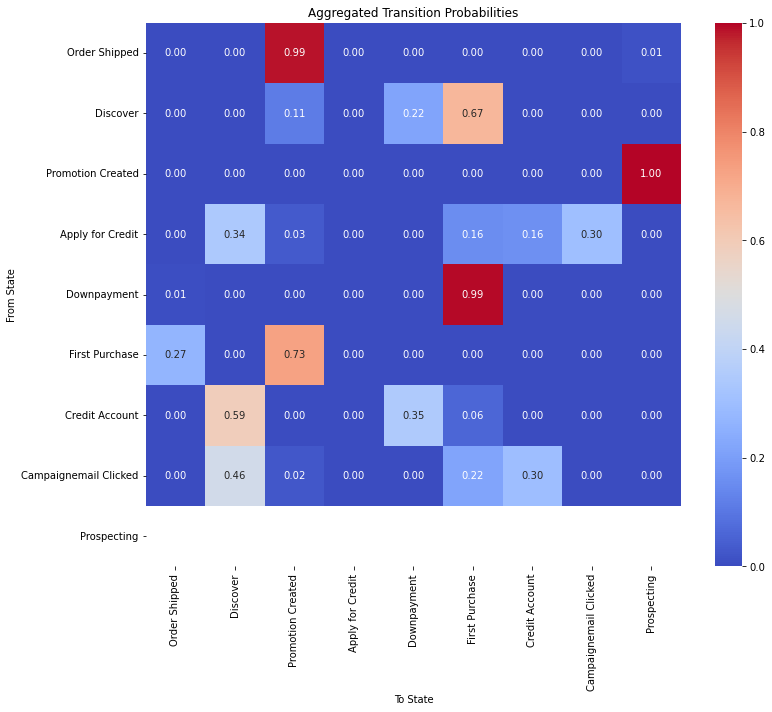

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(aggregated_probs, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=unique_states, yticklabels=unique_states)
plt.title("Aggregated Transition Probabilities")
plt.xlabel("To State")
plt.ylabel("From State")
plt.show()

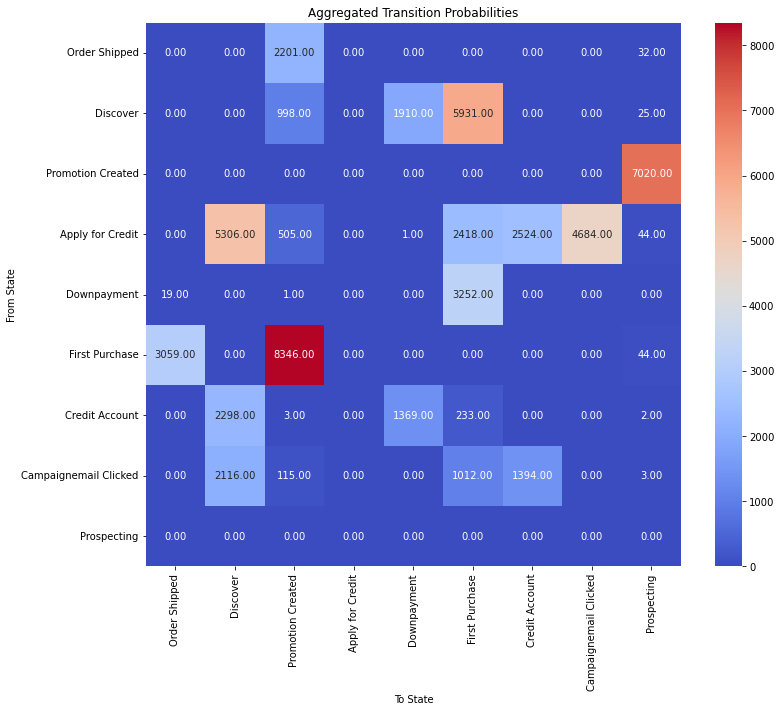

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(aggregated_counts, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=unique_states, yticklabels=unique_states)
plt.title("Aggregated Transition Probabilities")
plt.xlabel("To State")
plt.ylabel("From State")
plt.show()

In [ ]:
import pydtmc

In [ ]:
import pandas as pd
smaller_sample = pd.read_csv('smaller_sample.csv')
smaller_sample.sort_values(by=['customer_id', 'event_timestamp'], inplace=True)
unique_events = smaller_sample['event_name'].unique()
n_events = len(unique_events)

In [ ]:
event_name_to_index = {event_name: index for index, event_name in enumerate(unique_events)}

In [ ]:
import numpy as np

transition_counts = np.zeros((n_events, n_events))

In [ ]:
for _, group in smaller_sample.groupby('customer_id'):
    events = group['event_name'].apply(lambda x: event_name_to_index[x]).values
    for i in range(len(events) - 1):
        current_event, next_event = events[i], events[i + 1]
        transition_counts[current_event, next_event] += 1

In [ ]:
transition_probs = transition_counts / transition_counts.sum(axis=1, keepdims=True)

In [ ]:
transition_probs[np.isnan(transition_probs)] = 0
np.fill_diagonal(transition_probs, 0) 

In [ ]:
transition_df = pd.DataFrame(transition_probs, index=unique_events, columns=unique_events)

In [ ]:
column_sums = transition_df.sum(axis=0)
zero_columns = column_sums == 0

# For columns that sum to 0, assign uniform probabilities
for col in transition_df.columns[zero_columns]:
    transition_df[col] = 1 / len(transition_df.columns)

transition_df = transition_df.div(transition_df.sum(axis=0), axis=1)

In [ ]:
column_sums = transition_df.sum(axis=0)
print(column_sums)

application_web_approved                  1.0
browse_products                           1.0
campaignemail_clicked                     1.0
promotion_created                         1.0
catalog_(mail)                            1.0
begin_checkout                            1.0
add_to_cart                               1.0
view_cart                                 1.0
application_web_view                      1.0
application_web_submit                    1.0
campaign_click                            1.0
account_activitation                      1.0
place_order_web                           1.0
place_downpayment                         1.0
account_downpaymentcleared                1.0
order_shipped                             1.0
site_registration                         1.0
application_phone_approved                1.0
place_order_phone                         1.0
pre-application_(3rd_party_affiliates)    1.0
application_web_declined                  1.0
account_downpaymentreceived       

In [ ]:
names = transition_df.index.tolist()
print(names)

['application_web_approved', 'browse_products', 'campaignemail_clicked', 'promotion_created', 'catalog_(mail)', 'begin_checkout', 'add_to_cart', 'view_cart', 'application_web_view', 'application_web_submit', 'campaign_click', 'account_activitation', 'place_order_web', 'place_downpayment', 'account_downpaymentcleared', 'order_shipped', 'site_registration', 'application_phone_approved', 'place_order_phone', 'pre-application_(3rd_party_affiliates)', 'application_web_declined', 'account_downpaymentreceived', 'catalog_(email)_(experian)', 'fingerhut_university', 'application_phone_declined', 'application_web_pending']


In [ ]:
mc = pydtmc.MarkovChain(np.transpose(transition_df), names)

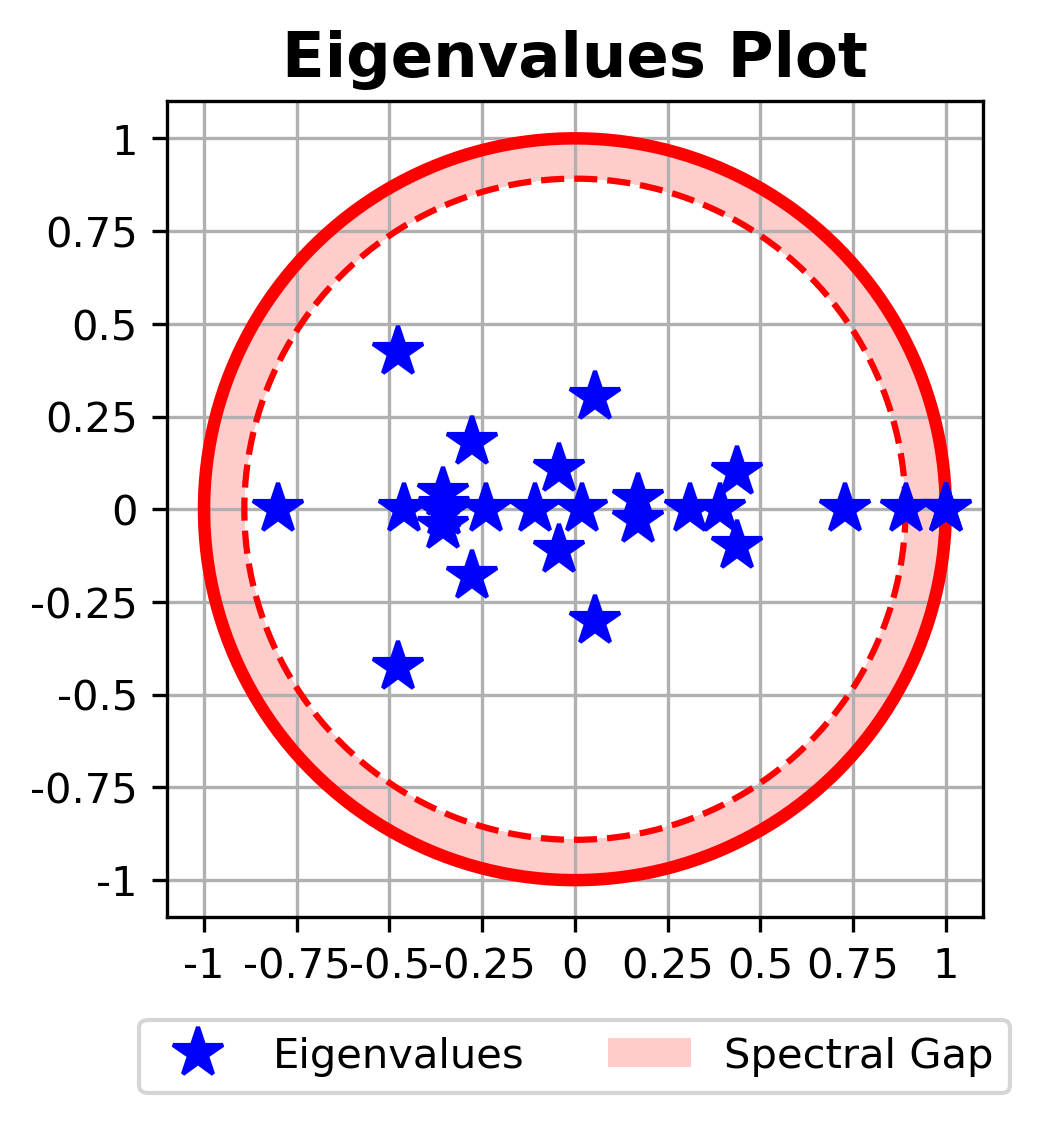

In [ ]:
pydtmc.plot_eigenvalues(mc, dpi=300)

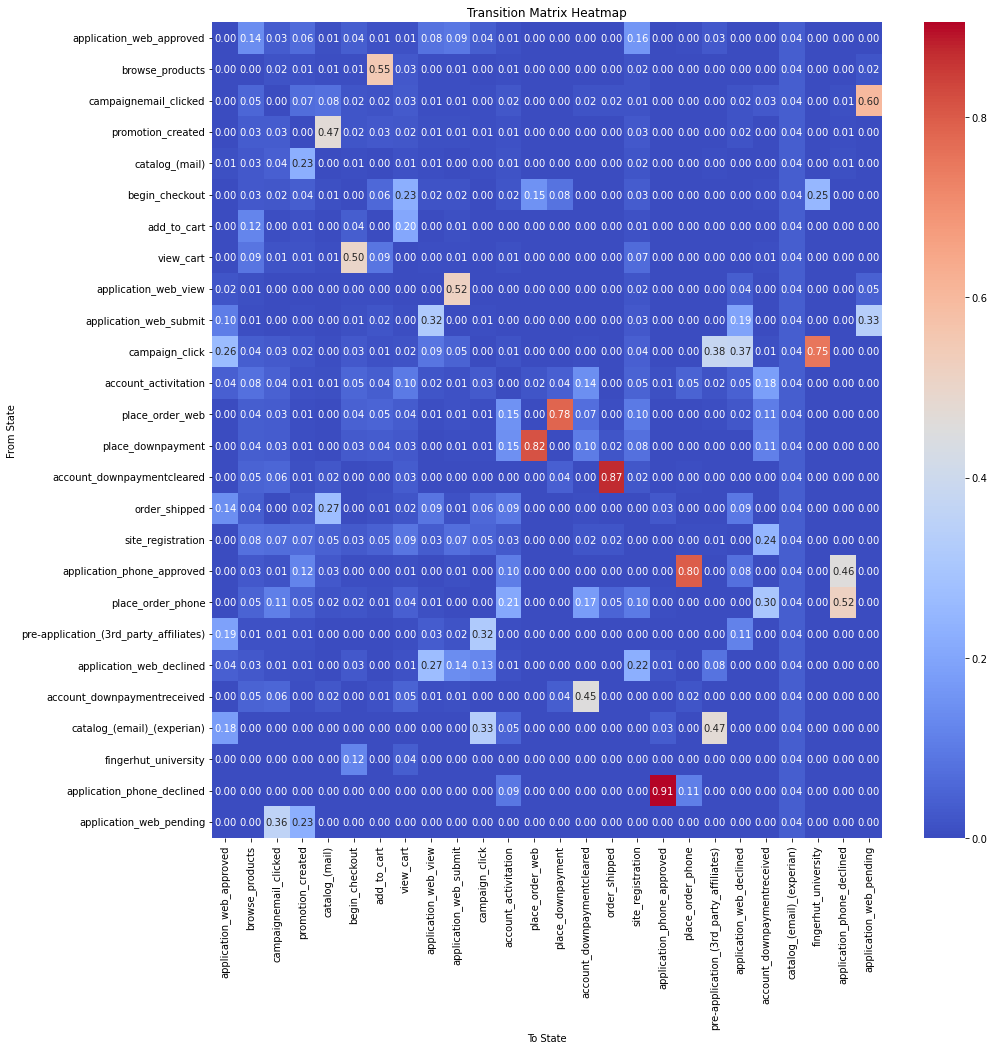

In [ ]:
import seaborn as sns
plt.figure(figsize=(15, 15))
sns.heatmap(transition_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Transition Matrix Heatmap')
plt.xlabel('To State')
plt.ylabel('From State')
plt.show()

## Modeling

### Logistic Regression - Promotions

In [ ]:
# read in fingerhut_combined_grouped.pkl

fingerhut_combined_grouped = pd.read_pickle('../Dataset/fingerhut_combined_grouped.pkl')

In [ ]:
# if either the place_order_web or place_order_phone is 1, then make new column place_order = 1, else 0

fingerhut_combined_grouped['place_order'] = np.where((fingerhut_combined_grouped['place_order_web'] == 1) | (fingerhut_combined_grouped['place_order_phone'] == 1), 1, 0)

In [ ]:
# randomly sample 100000 rows from fingerhut_combined_grouped

# fingerhut_combined_grouped_sample = fingerhut_combined_grouped.sample(n=100000, random_state=0)

fingerhut_combined_grouped_sample = fingerhut_combined_grouped

In [ ]:
# check how many rows have activation = 1

fingerhut_combined_grouped_sample['activation'].value_counts()

0    1254569
1     410862
Name: activation, dtype: int64

In [ ]:
# check how many rows have place_order = 1 and activation = 1

ordered_activated = fingerhut_combined_grouped_sample[(fingerhut_combined_grouped_sample['place_order'] == 1) & (fingerhut_combined_grouped_sample['activation'] == 1)]
print(len(ordered_activated))

354404


In [ ]:
# check how many rows have place_order = 0 and activation = 0

no_ordered_no_activated = fingerhut_combined_grouped_sample[(fingerhut_combined_grouped_sample['place_order'] == 0) & (fingerhut_combined_grouped_sample['activation'] == 0)]
print(len(no_ordered_no_activated))

1229136


In [ ]:
# check how many rows have place_order = 1 and activation = 0

ordered_no_activated = fingerhut_combined_grouped_sample[(fingerhut_combined_grouped_sample['place_order'] == 1) & (fingerhut_combined_grouped_sample['activation'] == 0)]
print(len(ordered_no_activated))

25433


In [ ]:
# check how many rows have place_order = 0 and activation = 1

no_ordered_activated = fingerhut_combined_grouped_sample[(fingerhut_combined_grouped_sample['place_order'] == 0) & (fingerhut_combined_grouped_sample['activation'] == 1)]
print(len(no_ordered_activated))

56458


In [ ]:
# sum of all the above 4 categories should be 100000

len(ordered_activated) + len(no_ordered_no_activated) + len(ordered_no_activated) + len(no_ordered_activated)

1665431

In [ ]:
# check how many rows have promotion_exposure = 1

fingerhut_combined_grouped_sample['promotion_exposure'].value_counts()[1]

1523909

In [ ]:
# check how many rows have promotion_expousre = 1 and activation = 1

promotion_activated = fingerhut_combined_grouped_sample[(fingerhut_combined_grouped_sample['promotion_exposure'] == 1) & (fingerhut_combined_grouped_sample['activation'] == 1)]
print(len(promotion_activated))

372432


In [ ]:
# check how many rows have promotion_expousre = 1 and activation = 0

promotion_no_activated = fingerhut_combined_grouped_sample[(fingerhut_combined_grouped_sample['promotion_exposure'] == 1) & (fingerhut_combined_grouped_sample['activation'] == 0)]
print(len(promotion_no_activated))

1151477


In [ ]:
promotion_ids = [2, 9, 20, 21, 1, 24]

In [ ]:
# for each row, if the list object in the ed_id column contains any of the above 6 ids, then make a new column `promotion_type` that contains the list of ids that were found in the ed_id column

fingerhut_combined_grouped_sample['promotion_type'] = fingerhut_combined_grouped_sample['ed_id'].apply(lambda x: list(set(x).intersection(promotion_ids)))

In [ ]:
# if any of the columns 2, 9, 20, 21, 1, 24 are 1, then make a new column `promotion_y_n` = 1, else 0

fingerhut_combined_grouped_sample['promotion_y_n'] = np.where((fingerhut_combined_grouped_sample[2] == 1) | (fingerhut_combined_grouped_sample[9] == 1) | (fingerhut_combined_grouped_sample[20] == 1) | (fingerhut_combined_grouped_sample[21] == 1) | (fingerhut_combined_grouped_sample[1] == 1) | (fingerhut_combined_grouped_sample[24] == 1), 1, 0)

In [ ]:
fingerhut_combined_grouped_sample[[2, 9, 20, 21, 1, 24, 'promotion_y_n']]

,2,9,20,21,1,24,promotion_y_n
0,1,0,0,0,1,0,1
1,1,0,0,0,1,0,1
2,1,0,0,0,0,0,1
3,1,0,0,0,0,0,1
4,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...
1665426,0,0,0,1,1,1,1
1665427,0,0,0,1,1,1,1
1665428,0,0,0,0,1,1,1
1665429,1,0,0,1,1,0,1


#### Classification

In [ ]:
# Using the activation column as the target variable, create a train-test split with 80% of the data in the training set and 20% in the test set.

from sklearn.model_selection import train_test_split

# X = fingerhut_combined_grouped_sample.drop('activation', axis=1)
# drop the columns that are not needed

X = fingerhut_combined_grouped_sample[[2, 9, 20, 21, 1, 24, 'promotion_y_n']]
X.columns = X.columns.astype(str)
y = fingerhut_combined_grouped_sample['activation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Using the training set, train a logistic regression model to predict the activation column. Use the following hyperparameters: max_iter=1000, random_state=0.

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, random_state=0, class_weight='balanced')
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=0)

In [ ]:
# Get the coefficients from the logistic regression model

logreg.coef_

# Pair feature names with coefficients

feature_names = X_train.columns
feature_names

feature_coefficients = dict(zip(feature_names, logreg.coef_[0]))

feature_coefficients

# Sort features by value of coefficient, in descending order

sorted_features = sorted(feature_coefficients.items(), key=lambda x: x[1], reverse=True)

sorted_features

# exponentiate the coefficients to get the odds ratio

odds_ratio = {k: np.exp(v) for k, v in feature_coefficients.items()}
odds_ratio

# order the odds ratio in descending order

sorted_odds_ratio = sorted(odds_ratio.items(), key=lambda x: x[1], reverse=True)
sorted_odds_ratio

[('24', 1.9362437597918083),
 ('1', 1.3759807339338685),
 ('promotion_y_n', 1.0385538769299125),
 ('9', 1.0),
 ('2', 0.8666245905305389),
 ('20', 0.6753108838183463),
 ('21', 0.2442945409238924)]

In [ ]:
# Using the test set, predict the activation column and calculate the accuracy of the model.

y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.5655459384485134

In [ ]:
# Using the test set, calculate the confusion matrix and classification report of the model.

from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.50      0.64    250911
           1       0.33      0.75      0.46     82176

    accuracy                           0.57    333087
   macro avg       0.60      0.63      0.55    333087
weighted avg       0.73      0.57      0.59    333087



In [ ]:
# try cross-validation in case the model is overfitting

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')

cv_scores

# find mean of the cross-validation scores

np.mean(cv_scores)

0.566044467548961

#### Time to purchase

In [ ]:
# keep only the rows where application = 1, activation = 1, place_order = 1

fingerhut_combined_grouped_sample_activated_ordered = fingerhut_combined_grouped_sample[(fingerhut_combined_grouped_sample['application'] == 1) & (fingerhut_combined_grouped_sample['activation'] == 1) & (fingerhut_combined_grouped_sample['place_order'] == 1)]

In [ ]:
apply_for_credit_ids = [3, 12, 13, 14, 15, 16, 17, 19]
account_activation_ids = [29]
place_order_ids = [7, 18]

In [ ]:
# ed_id is a column containing lists of ids for each row. event_timestamp is a column containing lists of the same length as ed_id.
# For each row, extract the timestamp from the event_timestamp column that corresponds to the id in the ed_id column that matches the apply_for_credit_ids, account_activation_ids, and place_order_ids lists and store each timestamp in a new column respectively.

# fingerhut_combined_grouped_sample_activated_ordered['apply_for_credit_timestamp'] = fingerhut_combined_grouped_sample_activated_ordered.apply(lambda x: x['event_timestamp'][x['ed_id'].index(3)] if 3 in x['ed_id'] else None, axis=1)
fingerhut_combined_grouped_sample_activated_ordered['apply_for_credit_timestamp'] = fingerhut_combined_grouped_sample_activated_ordered.apply(lambda x: x['event_timestamp'][next((i for i, id in enumerate(x['ed_id']) if id in apply_for_credit_ids), None)] if any(id in x['ed_id'] for id in apply_for_credit_ids) else None, axis=1)
fingerhut_combined_grouped_sample_activated_ordered['account_activation_timestamp'] = fingerhut_combined_grouped_sample_activated_ordered.apply(lambda x: x['event_timestamp'][x['ed_id'].index(29)] if 29 in x['ed_id'] else None, axis=1)
# fingerhut_combined_grouped_sample_activated_ordered['place_order_timestamp'] = fingerhut_combined_grouped_sample_activated_ordered.apply(lambda x: x['event_timestamp'][x['ed_id'].index(7)] if 7 in x['ed_id'] else None, axis=1)
fingerhut_combined_grouped_sample_activated_ordered['place_order_timestamp'] = fingerhut_combined_grouped_sample_activated_ordered.apply(lambda x: x['event_timestamp'][next((i for i, id in enumerate(x['ed_id']) if id in place_order_ids), None)] if any(id in x['ed_id'] for id in place_order_ids) else None, axis=1)

# Using the timestamps from the previous step, calculate the time it took for each customer to go from applying for credit to activating their account, and from activating their account to placing an order.

fingerhut_combined_grouped_sample_activated_ordered['apply_for_credit_timestamp'] = pd.to_datetime(fingerhut_combined_grouped_sample_activated_ordered['apply_for_credit_timestamp'])
fingerhut_combined_grouped_sample_activated_ordered['account_activation_timestamp'] = pd.to_datetime(fingerhut_combined_grouped_sample_activated_ordered['account_activation_timestamp'])
fingerhut_combined_grouped_sample_activated_ordered['place_order_timestamp'] = pd.to_datetime(fingerhut_combined_grouped_sample_activated_ordered['place_order_timestamp'])

fingerhut_combined_grouped_sample_activated_ordered['apply_for_credit_to_activation'] = (fingerhut_combined_grouped_sample_activated_ordered['account_activation_timestamp'] - fingerhut_combined_grouped_sample_activated_ordered['apply_for_credit_timestamp']).dt.days
fingerhut_combined_grouped_sample_activated_ordered['activation_to_place_order'] = (fingerhut_combined_grouped_sample_activated_ordered['place_order_timestamp'] - fingerhut_combined_grouped_sample_activated_ordered['account_activation_timestamp']).dt.days


/var/folders/6m/88dwrhnx7m3cybxwl1p0rtq40000gn/T/ipykernel_45608/2113970015.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fingerhut_combined_grouped_sample_activated_ordered['apply_for_credit_timestamp'] = fingerhut_combined_grouped_sample_activated_ordered.apply(lambda x: x['event_timestamp'][next((i for i, id in enumerate(x['ed_id']) if id in apply_for_credit_ids), None)] if any(id in x['ed_id'] for id in apply_for_credit_ids) else None, axis=1)
/var/folders/6m/88dwrhnx7m3cybxwl1p0rtq40000gn/T/ipykernel_45608/2113970015.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [ ]:
fingerhut_combined_grouped_sample_activated_ordered

,combined_id,ed_id,stage,event_timestamp,application,activation,promotion_exposure,place_order_web,place_order_phone,order_shipped,...,21,1,24,promotion_y_n,promotion_customer,apply_for_credit_timestamp,account_activation_timestamp,place_order_timestamp,apply_for_credit_to_activation,activation_to_place_order
0,0,"[2, 12, 1, 4, 4, 4, 11, 1, 5, 6, 1, 1, 4, 11, ...","[Discover, Apply for Credit, Promotion Created...","[2021-09-03T06:00:00.000Z, 2021-09-03T21:46:20...",1,1,1,1,0,1,...,0,1,0,1,1,2021-09-03 21:46:20+00:00,2021-09-12 00:00:00+00:00,2021-09-11 17:07:12+00:00,8,-1
1,1,"[2, 4, 11, 4, 4, 11, 4, 4, 4, 11, 4, 4, 5, 4, ...","[Discover, First Purchase, First Purchase, Fir...","[2021-02-20T06:00:00.000Z, 2021-02-20T22:23:39...",1,1,1,1,0,1,...,0,1,0,1,1,2021-02-20 23:10:24+00:00,2021-02-22 00:00:00+00:00,2021-02-22 14:41:23+00:00,1,0
4,4,"[12, 4, 4, 19, 5, 4, 11, 1, 5, 6, 29, 4, 11, 5...","[Apply for Credit, First Purchase, First Purch...","[2021-11-20T14:49:13.000Z, 2021-11-20T14:52:13...",1,1,1,1,0,1,...,0,1,0,1,1,2021-11-20 14:49:13+00:00,2021-12-12 00:00:00+00:00,2021-12-12 10:50:50+00:00,21,0
6,6,"[12, 4, 4, 4, 4, 4, 11, 5, 6, 8, 7, 29, 4, 4, ...","[Apply for Credit, First Purchase, First Purch...","[2021-01-19T06:25:55.000Z, 2021-01-19T06:33:59...",1,1,1,1,0,1,...,0,1,0,1,1,2021-01-19 06:25:55+00:00,2021-01-20 00:00:00+00:00,2021-01-19 22:37:21+00:00,0,-1
13,13,"[2, 12, 1, 29, 6, 4, 11, 5, 19, 5, 4, 8, 6, 7,...","[Discover, Apply for Credit, Promotion Created...","[2023-05-15T04:09:11.000Z, 2023-05-15T22:09:11...",1,1,1,1,0,1,...,0,1,0,1,1,2023-05-15 22:09:11+00:00,2023-05-16 00:00:00+00:00,2023-05-20 18:55:14+00:00,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665405,1665405,"[15, 18, 18, 29, 27, 28, 15, 18, 1, 1]","[Apply for Credit, First Purchase, First Purch...","[2021-05-30T15:37:29.000Z, 2021-05-30T15:39:25...",1,1,1,0,1,1,...,0,1,0,1,1,2021-05-30 15:37:29+00:00,2021-06-01 00:00:00+00:00,2021-05-30 15:39:25.910000+00:00,1,-2
1665408,1665408,"[29, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...","[Credit Account, Apply for Credit, Apply for C...","[2021-10-07T00:00:00.000Z, 2021-10-07T03:59:04...",1,1,1,1,0,0,...,0,1,1,1,1,2021-10-07 03:59:04+00:00,2021-10-07 00:00:00+00:00,2022-10-21 04:13:09+00:00,-1,379
1665415,1665415,"[19, 19, 19, 19, 19, 19, 19, 3, 12, 4, 4, 4, 4...","[Apply for Credit, Apply for Credit, Apply for...","[2021-10-29T11:17:15.000Z, 2021-10-29T11:17:17...",1,1,1,1,0,1,...,0,1,1,1,1,2021-10-29 11:17:15+00:00,2021-11-09 00:00:00+00:00,2021-11-09 12:07:11+00:00,10,0
1665418,1665418,"[12, 2, 4, 11, 4, 1, 1, 4, 4, 4, 4, 11, 11, 11...","[Apply for Credit, Discover, First Purchase, F...","[2021-05-13T00:34:05.000Z, 2021-05-13T06:00:00...",1,1,1,1,0,0,...,1,1,0,1,1,2021-05-13 00:34:05+00:00,2021-06-08 00:00:00+00:00,2021-06-08 16:35:44+00:00,25,0


In [ ]:
# extract apply_for_credit_to_activation and activation_to_place_order columns and save them to a new dataframe

fingerhut_combined_grouped_sample_activated_ordered_time = fingerhut_combined_grouped_sample_activated_ordered[['apply_for_credit_to_activation', 'activation_to_place_order']]

In [ ]:
fingerhut_combined_grouped_sample_activated_ordered_time

,apply_for_credit_to_activation,activation_to_place_order
0,8,-1
1,1,0
4,21,0
6,0,-1
13,0,4
...,...,...
1665405,1,-2
1665408,-1,379
1665415,10,0
1665418,25,0


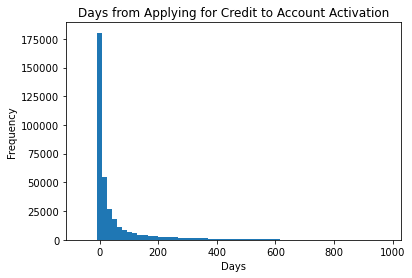

In [ ]:
# plot both columns as histograms

import matplotlib.pyplot as plt

fingerhut_combined_grouped_sample_activated_ordered_time['apply_for_credit_to_activation'].plot(kind='hist', bins=60)
# add title and axis labels

plt.title('Days from Applying for Credit to Account Activation')
plt.xlabel('Days')
plt.ylabel('Frequency')

plt.show()

# fingerhut_combined_grouped_sample_activated_ordered_time['activation_to_place_order'].plot(kind='hist', bins=60)

# plt.show()

In [ ]:
# append promotion_y_n from fingerhut_combined_grouped_sample to fingerhut_combined_grouped_sample_activated_ordered

fingerhut_combined_grouped_sample_activated_ordered_time['promotion_y_n'] = fingerhut_combined_grouped_sample_activated_ordered['promotion_y_n']

fingerhut_combined_grouped_sample_activated_ordered_time

/var/folders/6m/88dwrhnx7m3cybxwl1p0rtq40000gn/T/ipykernel_45608/2234296860.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fingerhut_combined_grouped_sample_activated_ordered_time['promotion_y_n'] = fingerhut_combined_grouped_sample_activated_ordered['promotion_y_n']


,apply_for_credit_to_activation,activation_to_place_order,promotion_y_n
0,8,-1,1
1,1,0,1
4,21,0,1
6,0,-1,1
13,0,4,1
...,...,...,...
1665405,1,-2,1
1665408,-1,379,1
1665415,10,0,1
1665418,25,0,1


In [ ]:
# remove outliers from apply_for_credit_to_activation column

fingerhut_combined_grouped_sample_activated_ordered_time = fingerhut_combined_grouped_sample_activated_ordered_time[fingerhut_combined_grouped_sample_activated_ordered_time['apply_for_credit_to_activation'] < 600]


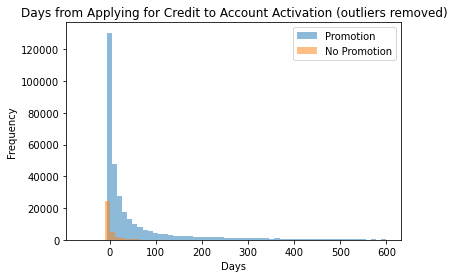

In [ ]:
# make two histograms for apply_for_credit_to_activation based on whether promotion_y_n is 1 or 0

fingerhut_combined_grouped_sample_activated_ordered_time[fingerhut_combined_grouped_sample_activated_ordered_time['promotion_y_n'] == 1]['apply_for_credit_to_activation'].plot(kind='hist', bins=60, alpha=0.5, label='Promotion')
fingerhut_combined_grouped_sample_activated_ordered_time[fingerhut_combined_grouped_sample_activated_ordered_time['promotion_y_n'] == 0]['apply_for_credit_to_activation'].plot(kind='hist', bins=60, alpha=0.5, label='No Promotion')

plt.title('Days from Applying for Credit to Account Activation (outliers removed)')

plt.xlabel('Days')

plt.ylabel('Frequency')

plt.legend()

plt.show()

#### Numbers

In [ ]:
# find the percentage of people who have either place_order_phone or place_order_web == 1

fingerhut_combined_grouped_sample[(fingerhut_combined_grouped_sample['place_order_phone'] == 1) | (fingerhut_combined_grouped_sample['place_order_web'] == 1)].shape[0] / fingerhut_combined_grouped_sample.shape[0]

0.22807129205593027

In [ ]:
promotion_ids = [2, 9, 20, 21, 1, 24]

In [ ]:
type(fingerhut_combined_grouped_sample['ed_id'])

pandas.core.series.Series

In [ ]:
promotion_customers = []

for id_list in fingerhut_combined_grouped_sample['ed_id']:
    # if any value in id_list is in promotion_ids, store the index of the row in promotion_customers
    if any(x in id_list for x in promotion_ids):
        promotion_customers.append(True)
    else:
        promotion_customers.append(False)
        

In [ ]:
fingerhut_combined_grouped_sample['promotion_customer'] = promotion_customers

# convert promotion_customer to int

fingerhut_combined_grouped_sample['promotion_customer'] = fingerhut_combined_grouped_sample['promotion_customer'].astype(int)

In [ ]:
# of those who have promotion_customer == 1, find the percentage of people who have either place_order_phone or place_order_web == 1

fingerhut_combined_grouped_sample[(fingerhut_combined_grouped_sample['promotion_customer'] == 1) & ((fingerhut_combined_grouped_sample['place_order_phone'] == 1) | (fingerhut_combined_grouped_sample['place_order_web'] == 1))].shape[0] / fingerhut_combined_grouped_sample[fingerhut_combined_grouped_sample['promotion_customer'] == 1].shape[0]

0.22422008138281224